<a href="https://colab.research.google.com/github/shoreey/Alzheimer-Prediction-with-excel-dataset/blob/main/Alzheimer_Prediction_with_cognitive_test_brain_data_and_demographic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alzheimer Prediction

C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are i


Logistic Regression:
              precision    recall  f1-score   support

           0       0.50      0.12      0.20        24
           1       0.45      0.25      0.32        40
           2       0.44      0.59      0.51        37
           3       0.43      0.70      0.53        50
           4       0.00      0.00      0.00         9

    accuracy                           0.44       160
   macro avg       0.36      0.33      0.31       160
weighted avg       0.42      0.44      0.39       160



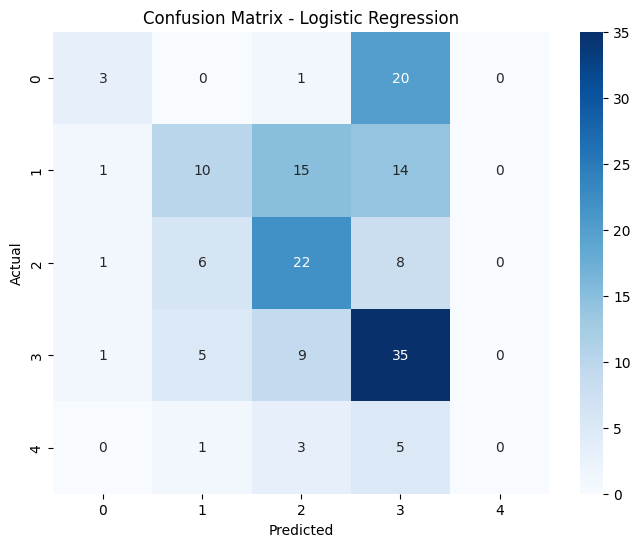


Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.82      0.90      0.86        40
           2       0.62      0.49      0.55        37
           3       0.66      0.80      0.72        50
           4       0.00      0.00      0.00         9

    accuracy                           0.73       160
   macro avg       0.59      0.62      0.60       160
weighted avg       0.68      0.72      0.70       160



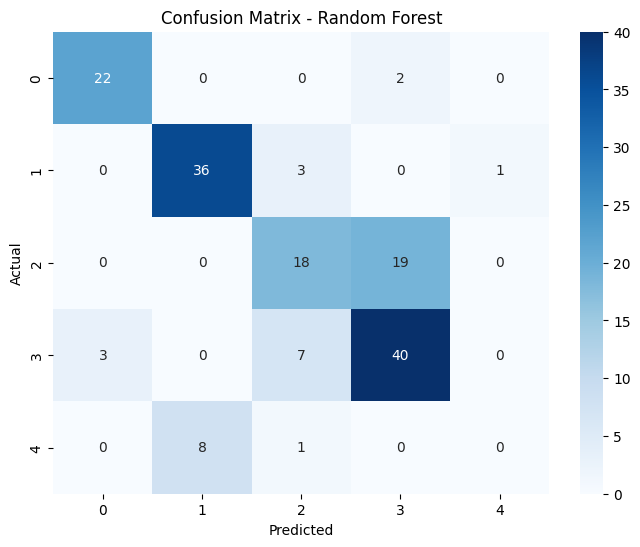


GBM:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.78      0.78      0.78        40
           2       0.66      0.57      0.61        37
           3       0.70      0.78      0.74        50
           4       0.00      0.00      0.00         9

    accuracy                           0.71       160
   macro avg       0.60      0.61      0.60       160
weighted avg       0.70      0.71      0.70       160



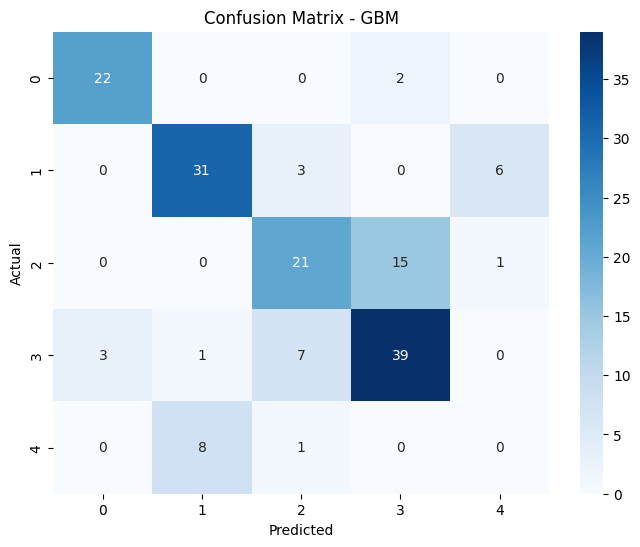


K-NN:
              precision    recall  f1-score   support

           0       0.11      0.12      0.12        24
           1       0.24      0.23      0.23        40
           2       0.37      0.41      0.38        37
           3       0.33      0.34      0.34        50
           4       0.00      0.00      0.00         9

    accuracy                           0.28       160
   macro avg       0.21      0.22      0.21       160
weighted avg       0.27      0.28      0.27       160



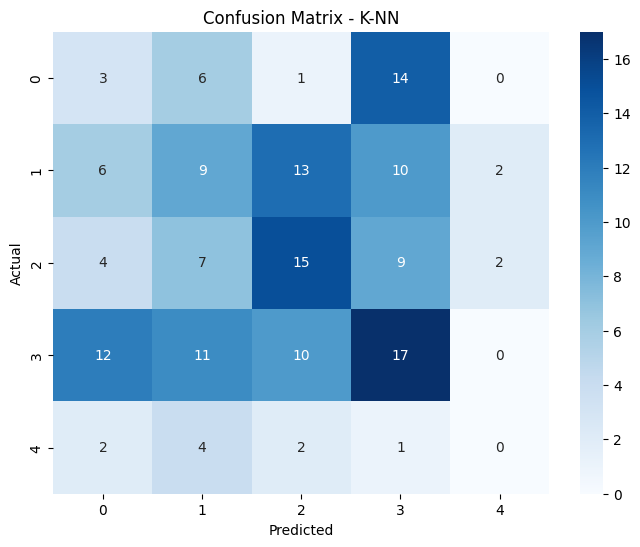

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Load data
diagnosis_df = pd.read_excel("C:/Data.xlsx", sheet_name="Diagnosis target")
cognitive_scores_df = pd.read_excel("C:/data.xlsx", sheet_name="Cognitive score")
data_df = pd.read_excel("C:/data.xlsx", sheet_name="Data")

# Merge data
merged_df = diagnosis_df.merge(cognitive_scores_df, on=["RID", "Test_data"], how="inner")
merged_df = merged_df.merge(data_df, on=["RID", "Test_data"], how="inner")

# Encode categorical variables
label_encoder = LabelEncoder()
merged_df["Diagnosis"] = label_encoder.fit_transform(merged_df["Diagnosis"])

# One-hot encode categorical variables
categorical_cols = ["Gender", "Ethnicity", "Race", "Marital_status"]
merged_df = pd.get_dummies(merged_df, columns=categorical_cols)

# impute the missing rows with mode
merged_df.fillna(merged_df.mode().iloc[0], inplace=True)


# Filter data based on Test_data
train_df = merged_df[merged_df["Test_data"] == 0]
test_df = merged_df[merged_df["Test_data"] == 1]

# Split data into features and target variable
X_train = train_df.select_dtypes(include=['float64', 'int64']).drop(["RID", "Test_data"], axis=1)
y_train = train_df["Diagnosis"]
X_test = test_df.select_dtypes(include=['float64', 'int64']).drop(["RID", "Test_data"], axis=1)
y_test = test_df["Diagnosis"]

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "GBM": GradientBoostingClassifier(),
    "K-NN": KNeighborsClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print classification report
    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Logistic Regression: OrderedDict([('C', 2.687842615016836), ('solver', 'liblinear')])

Logistic Regression - Tuned:
              precision    recall  f1-score   support

           0       0.67      0.42      0.51        24
           1       0.54      0.50      0.52        40
           2       0.45      0.51      0.48        37
           3       0.45      0.60      0.52        50
   

C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


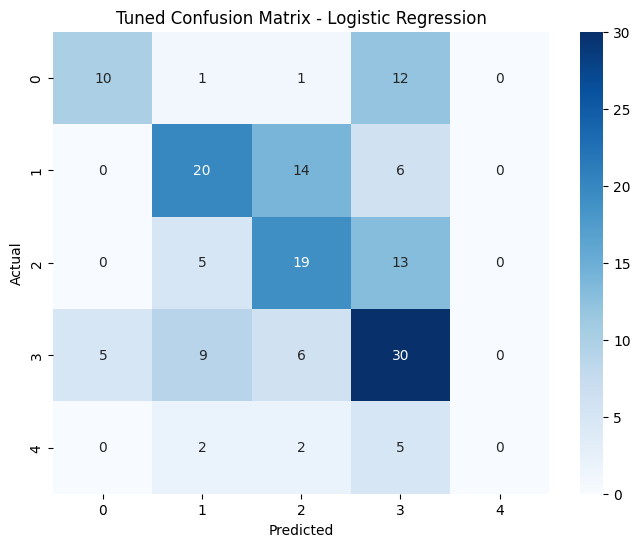

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Random Forest: OrderedDict([('max_depth', 20), ('n_estimators', 120)])

Random Forest - Tuned:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       0.82      0.90      0.86        40
           2       0.68      0.46      0.55        37
           3       0.66      0.88      0.75        50
           4       0.00 

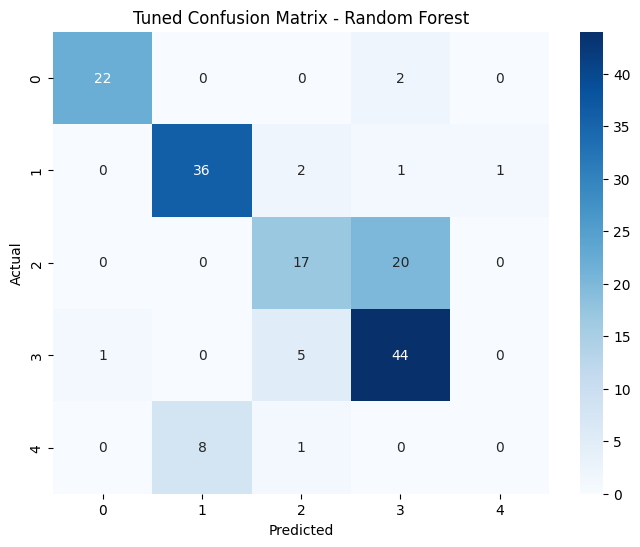

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for GBM: OrderedDict([('learning_rate', 0.09375113636166926), ('n_estimators', 85)])

GBM - Tuned:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.80      0.80      0.80        40
           2       0.70      0.62      0.66        37
           3       0.71      0.80      0.75        50
           4       0.17 

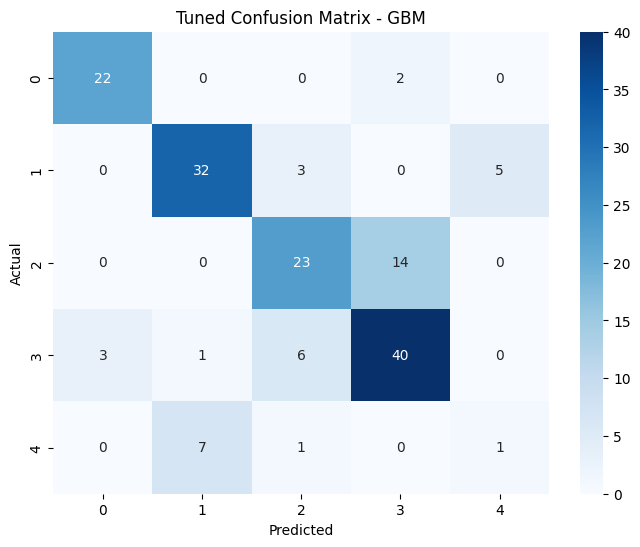

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for K-NN: OrderedDict([('n_neighbors', 8)])

K-NN - Tuned:
              precision    recall  f1-score   support

           0       0.22      0.21      0.21        24
           1       0.34      0.30      0.32        40
           2       0.42      0.49      0.45        37
           3       0.36      0.38      0.37        50
           4       0.00      0.00      0.00         9

    accur

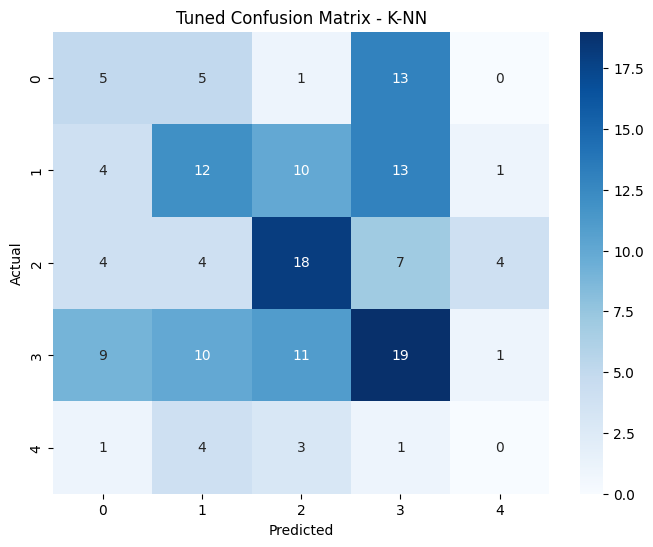

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Define search space for hyperparameters
param_space = {
    'Logistic Regression': {
        'C': Real(0.1, 10),
        'solver': Categorical(['liblinear', 'lbfgs'])
    },
    'Random Forest': {
        'n_estimators': Integer(100, 500),
        'max_depth': Integer(5, 50)
    },
    'GBM': {
        'learning_rate': Real(0.01, 1),
        'n_estimators': Integer(50, 200)
    },
    'K-NN': {
        'n_neighbors': Integer(3, 10)
    }
}

# Bayesian Optimization for each model
for name, model in models.items():
    if name in param_space:
        bayes_search = BayesSearchCV(
            estimator=model,
            search_spaces=param_space[name],
            n_iter=10,
            cv=5,
            scoring='accuracy',
            verbose=1,
            n_jobs=-1
        )
        bayes_search.fit(X_train, y_train)
        best_params = bayes_search.best_params_
        print(f"Best parameters for {name}: {best_params}")
        # Update the model with best parameters
        model.set_params(**best_params)
        model.fit(X_train, y_train)

        # Evaluate the tuned model
        y_pred = model.predict(X_test)
        print(f"\n{name} - Tuned:")
        print(classification_report(y_test, y_pred))

        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Tuned Confusion Matrix - {name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()


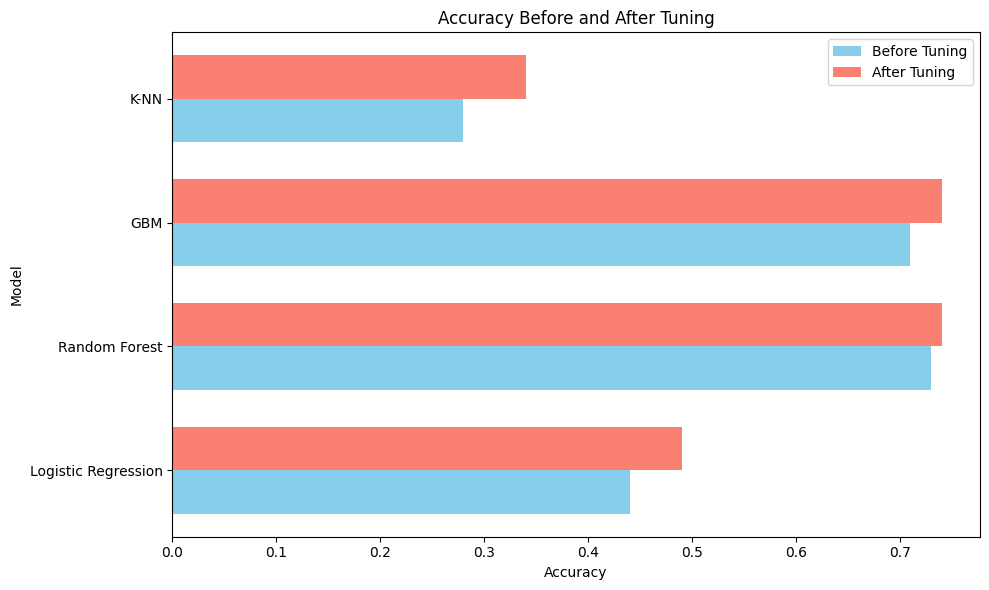

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Accuracy before tuning
accuracy_before_data = {
    "Model": ["Logistic Regression", "Random Forest", "GBM", "K-NN"],
    "Accuracy Before Tuning": [0.44, 0.73, 0.71, 0.28]
}
accuracy_before_df = pd.DataFrame(accuracy_before_data)

# Accuracy after tuning
accuracy_after_data = {
    "Model": ["Logistic Regression", "Random Forest", "GBM", "K-NN"],
    "Accuracy After Tuning": [0.49, 0.74, 0.74, 0.34]
}
accuracy_after_df = pd.DataFrame(accuracy_after_data)

# Merge the dataframes
accuracy_merged_df = accuracy_before_df.merge(accuracy_after_df, on="Model")

# Plotting
plt.figure(figsize=(10, 6))

# Plotting both accuracies
bar_width = 0.35
index = np.arange(len(accuracy_merged_df["Model"]))
plt.barh(index, accuracy_merged_df["Accuracy Before Tuning"], bar_width, label='Before Tuning', color='skyblue')
plt.barh(index + bar_width, accuracy_merged_df["Accuracy After Tuning"], bar_width, label='After Tuning', color='salmon')

# Adding labels and title
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Before and After Tuning')
plt.yticks(index + bar_width / 2, accuracy_merged_df["Model"])
plt.legend()

plt.tight_layout()
plt.show()


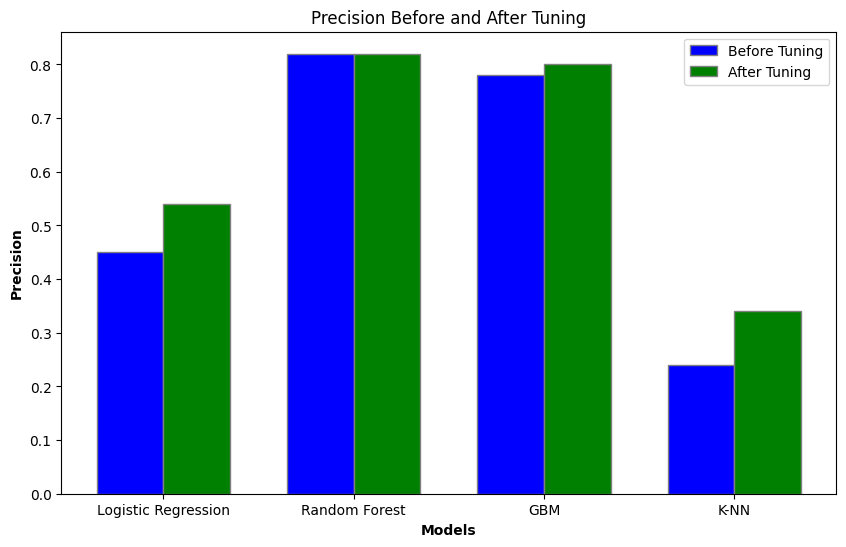

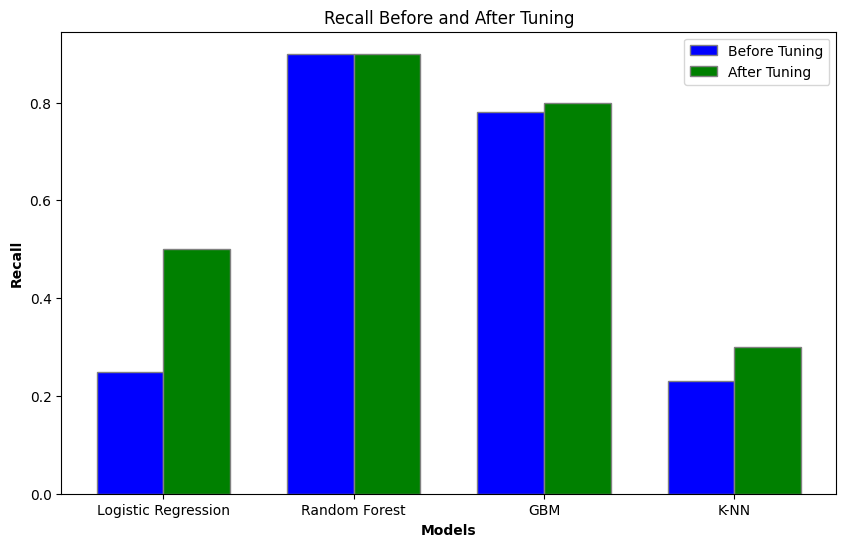

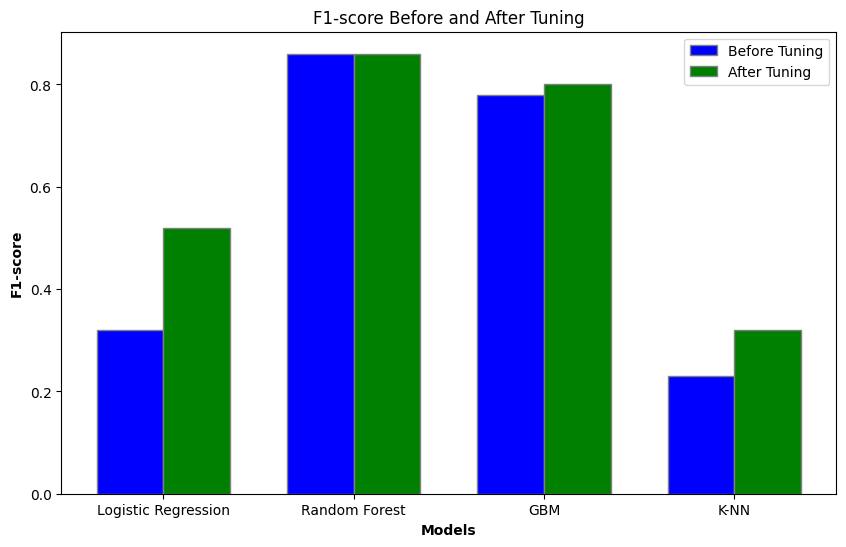

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Precision, recall, and F1-score before tuning
precision_before = [0.45, 0.82, 0.78, 0.24]
recall_before = [0.25, 0.90, 0.78, 0.23]
f1_score_before = [0.32, 0.86, 0.78, 0.23]

# Precision, recall, and F1-score after tuning
precision_after = [0.54, 0.82, 0.80, 0.34]
recall_after = [0.50, 0.90, 0.80, 0.30]
f1_score_after = [0.52, 0.86, 0.80, 0.32]

# Model names
models = ['Logistic Regression', 'Random Forest', 'GBM', 'K-NN']

# Bar width
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Plotting the bar plots
plt.figure(figsize=(10, 6))
plt.bar(r1, precision_before, color='b', width=bar_width, edgecolor='grey', label='Before Tuning')
plt.bar(r2, precision_after, color='g', width=bar_width, edgecolor='grey', label='After Tuning')

# Adding labels
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Precision', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.title('Precision Before and After Tuning')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(r1, recall_before, color='b', width=bar_width, edgecolor='grey', label='Before Tuning')
plt.bar(r2, recall_after, color='g', width=bar_width, edgecolor='grey', label='After Tuning')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Recall', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.title('Recall Before and After Tuning')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(r1, f1_score_before, color='b', width=bar_width, edgecolor='grey', label='Before Tuning')
plt.bar(r2, f1_score_after, color='g', width=bar_width, edgecolor='grey', label='After Tuning')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('F1-score', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.title('F1-score Before and After Tuning')
plt.legend()
plt.show()
